## Importing Libraries and Setting Up Environment

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
np.random.seed(42)

In [20]:
pca_df = pd.read_csv('../data/heart_disease_preprocessed_pca.csv')

X_pca = pca_df.drop('num', axis=1)
y = pca_df['num']

# Unsupervised Learning - Clustering

## KMeans

In [21]:
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans.fit(X_pca)

labels = kmeans.labels_
centers = kmeans.cluster_centers_

print("Silhouette Score:", silhouette_score(X_pca, labels))

Silhouette Score: 0.1640092642947117


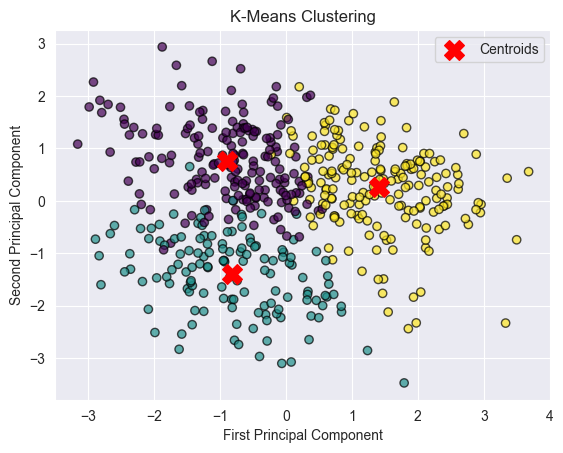

In [22]:
plt.scatter(X_pca['PCA1'], X_pca['PCA2'], c=labels, cmap='viridis', alpha=0.7, edgecolor='k')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

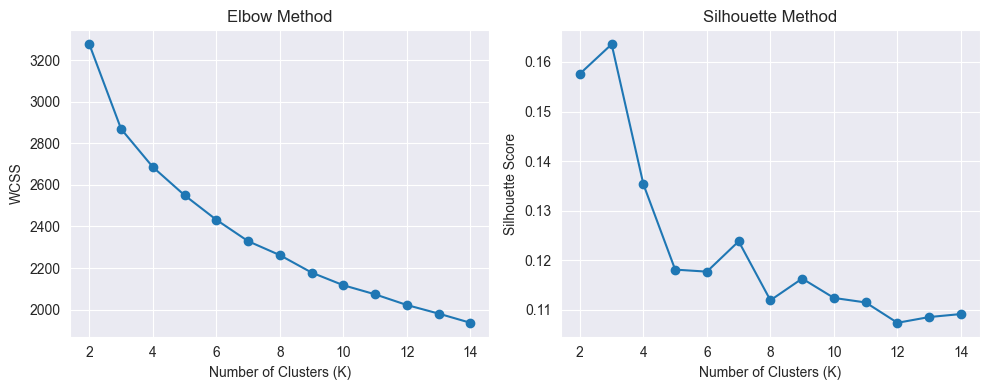

In [23]:
wcss = []
silhouette_scores = []

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, labels))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(range(2, 15), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method')

plt.subplot(1,2,2)
plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')

plt.tight_layout()
plt.show()

## Hierarchical Clustering

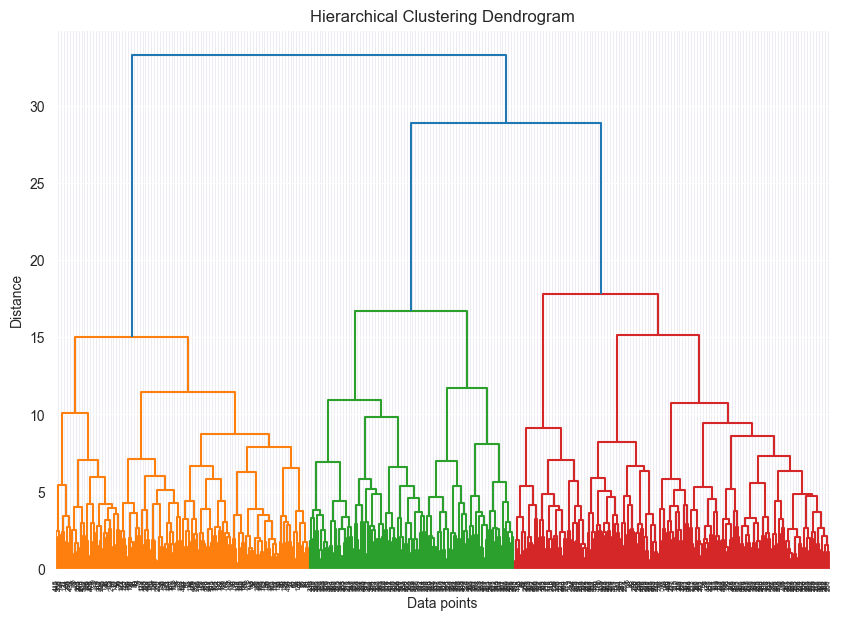

In [24]:
linkage_data = linkage(X_pca, method= 'ward', metric='euclidean')

plt.figure(figsize=(10, 7))
dendrogram(linkage_data)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()